In [15]:
import json

study = json.loads(open('Study.json', 'r', encoding='utf-8').read())
study_24fev = json.loads(open('Study (24 fev).json', 'r', encoding='utf-8').read())
study_V2 = json.loads(open('StudyV2.json', 'r', encoding='utf-8').read())
study_manual = json.loads(open('Study (manual).json', 'r', encoding='utf-8').read())

def update_counts(array, number):
    for value, count in array:
        if value == number:
            array.remove((value, count))
            count += 1
            array.append((value, count))
            return array
    array.append((number, 1))
    return array

In [10]:
# Separate V1 together and separate into two different files
study_together, study_separate = {}, {}
for article in study.keys():
    study_together[article] = study[article]['Together']
    study_separate[article] = study[article]['Separate']
    
open('StudyTogether.json', 'w', encoding='utf-8').write(json.dumps(study_together, indent=2))
open('StudySeparate.json', 'w', encoding='utf-8').write(json.dumps(study_separate, indent=2))

2163

In [2]:
differences = []
total_together, total_separate  = 0, 0
biggest_difference = 0
together_sum_values, separate_sum_values = [], []

for article in study.keys():
    together_article_quality, separate_article_quality = 0, 0
    for question in study[article]['Together'].keys():
        together, separate = study[article]['Together'][question], study[article]['Separate'][question]
        diff = abs(together - separate)
        if diff >= biggest_difference:
            biggest_difference = diff
            print(article, "\n", question, together, separate)
        together_article_quality += together
        separate_article_quality += separate
        
    together_sum_values = update_counts(together_sum_values, together_article_quality)
    separate_sum_values = update_counts(separate_sum_values, separate_article_quality)
    
    total_separate += separate_article_quality
    total_together += together_article_quality
    differences.append(abs(together_article_quality - separate_article_quality))
    
together_sum_values.sort(key=lambda x: x[0])
separate_sum_values.sort(key=lambda x: x[0])
    
print("\nAverage difference between a together prompt and a separate prompt: ", sum(differences) / len(differences))
print("Total together: ", total_together, " Average: ", total_together / len(study.keys()))
print("Total separate: ", total_separate, " Average: ", total_separate / len(study.keys()))
print("\nTogether values: ", together_sum_values)
print("Separate values: ", separate_sum_values, "\n")
print("DON'T FORGET THAT QUESTION 2 IS STILL MISSING. THAT'S WHY THERE AREN'T ANY ABOVE 20.")

Automatic Detection of Inconsistencies and Hierarchical Topic Classification for Open-Domain Chatbots 
 Q1 3 3
Automatic Detection of Inconsistencies and Hierarchical Topic Classification for Open-Domain Chatbots 
 Q3 2 3
Automatic Detection of Inconsistencies and Hierarchical Topic Classification for Open-Domain Chatbots 
 Q4 4 2
Query-Focused Submodular Demonstration Selection for In-Context Learning in Large Language Models 
 Q3 2 4
LAraBench: Benchmarking Arabic AI with Large Language Models 
 Q7 3 1
Improving short text classification with augmented data using GPT-3 
 Q4 3 1

Average difference between a together prompt and a separate prompt:  1.5
Total together:  199  Average:  16.583333333333332
Total separate:  199  Average:  16.583333333333332

Together values:  [(13, 1), (15, 1), (16, 4), (17, 2), (18, 3), (19, 1)]
Separate values:  [(14, 3), (15, 1), (16, 1), (17, 2), (18, 3), (19, 2)] 

DON'T FORGET THAT QUESTION 2 IS STILL MISSING. THAT'S WHY THERE AREN'T ANY ABOVE 20.


In [3]:
total_differences_together, total_differences_separate = 0, 0

for article in study.keys():
    print(f"Article: {article}")
    difference_together, difference_separate = 0, 0
    for question in study[article]['Together'].keys():
        if study[article]['Together'][question] != study_24fev[article]['Together'][question]:
            print(f"Together: {question} - {study[article]['Together'][question]} - {study_24fev[article]['Together'][question]} (24 fev)")
            difference_together += 1
        if study[article]['Separate'][question] != study_24fev[article]['Separate'][question]:
            print(f"Separate: {question} - {study[article]['Separate'][question]} - {study_24fev[article]['Separate'][question]} (24 fev)")
            difference_separate += 1
    print(f"\nDifferences in the article: \nTogether: {difference_together}, Separate: {difference_separate}\n")
    total_differences_together += difference_together
    total_differences_separate += difference_separate
    
print(f"\nTotal differences: Together: {total_differences_together}, Separate: {total_differences_separate}")
    

Article: Automatic Detection of Inconsistencies and Hierarchical Topic Classification for Open-Domain Chatbots

Differences in the article: 
Together: 0, Separate: 0

Article: Cicognini at ACTI: Analysis of techniques for conspiracies individuation in Italian

Differences in the article: 
Together: 0, Separate: 0

Article: Query-Focused Submodular Demonstration Selection for In-Context Learning in Large Language Models
Together: Q6 - 4 - 3 (24 fev)

Differences in the article: 
Together: 1, Separate: 0

Article: MetRoBERTa: Leveraging Traditional Customer Relationship Management Data to Develop a Transit-Topic-Aware Language Model

Differences in the article: 
Together: 0, Separate: 0

Article: Semi-Automatic Topic Discovery and Classification for Epidemic Intelligence via Large Language Models
Together: Q4 - 2 - 3 (24 fev)
Together: Q6 - 3 - 4 (24 fev)
Together: Q7 - 2 - 3 (24 fev)

Differences in the article: 
Together: 3, Separate: 0

Article: ACTI at EVALITA 2023:Automatic Conspira

In [9]:
results_V1_together, results_V1_separate, results_V2, results_24fev_together, results_24fev_separate = [], [], [], [], []
values_v1_together, values_v1_separate, values_v2, values_24fev_together, values_24fev_separate = [], [], [], [], []

for article in study_V2.keys():
    print(f"{article}")
    sum_v1_together, sum_v1_separate, sum_v2, sum_24fev_together, sum_24fev_separate = 0, 0, 0, 0, 0
    for question in study_V2[article].keys():
        score_V2 = study_V2[article][question]
        score_V1_together = study[article]['Together'][question]
        score_V1_separate = study[article]['Separate'][question]
        score_24fev_together = study_24fev[article]['Together'][question]
        score_24fev_separate = study_24fev[article]['Separate'][question]
        
        scores = [score_V2, score_V1_together, score_V1_separate, score_24fev_together, score_24fev_separate]
        
        if sum(scores)/len(scores) == score_V2:
            print(f"{question}: the scores are all the same.")
        else:
            print(f"{question}:\n\tScore V2: {score_V2} | Score V1 Together: {score_V1_together} | Score V1 Separate: {score_V1_separate} | Score 24 fev Together: {score_24fev_together} | Score 24 fev Separate: {score_24fev_separate}")
            
        sum_v1_together += score_V1_together
        sum_v1_separate += score_V1_separate
        sum_v2 += score_V2
        sum_24fev_together += score_24fev_together
        sum_24fev_separate += score_24fev_separate
        
        values_v1_together = update_counts(values_v1_together, score_V1_together)
        values_v1_separate = update_counts(values_v1_separate, score_V1_separate)
        values_v2 = update_counts(values_v2, score_V2)
        values_24fev_together = update_counts(values_24fev_together, score_24fev_together)
        values_24fev_separate = update_counts(values_24fev_separate, score_24fev_separate)
        
    results_V1_together = update_counts(results_V1_together, sum_v1_together)
    results_V1_separate = update_counts(results_V1_separate, sum_v1_separate)
    results_V2 = update_counts(results_V2, sum_v2)
    results_24fev_together = update_counts(results_24fev_together, sum_24fev_together)
    results_24fev_separate = update_counts(results_24fev_separate, sum_24fev_separate)
    
    
    
results_V1_together.sort(key=lambda x: x[0])
results_V1_separate.sort(key=lambda x: x[0])
results_V2.sort(key=lambda x: x[0])
results_24fev_together.sort(key=lambda x: x[0])
results_24fev_separate.sort(key=lambda x: x[0])
values_v1_together.sort(key=lambda x: x[0])
values_v1_separate.sort(key=lambda x: x[0])
values_v2.sort(key=lambda x: x[0])
values_24fev_together.sort(key=lambda x: x[0])
values_24fev_separate.sort(key=lambda x: x[0])

print("\nResults V1 Together: ", results_V1_together)
print("Results V1 Separate: ", results_V1_separate)
print("Results V2: ", results_V2)
print("Results 24 fev Together: ", results_24fev_together)
print("Results 24 fev Separate: ", results_24fev_separate)

print("\nValues V1 Together: ", values_v1_together)
print("Values V1 Separate: ", values_v1_separate)
print("Values V2: ", values_v2)
print("Values 24 fev Together: ", values_24fev_together)
print("Values 24 fev Separate: ", values_24fev_separate)

Automatic Detection of Inconsistencies and Hierarchical Topic Classification for Open-Domain Chatbots
Q1: the scores are all the same.
Q3:
	Score V2: 2 | Score V1 Together: 2 | Score V1 Separate: 3 | Score 24 fev Together: 2 | Score 24 fev Separate: 3
Q4: the scores are all the same.
Q5:
	Score V2: 2 | Score V1 Together: 3 | Score V1 Separate: 3 | Score 24 fev Together: 3 | Score 24 fev Separate: 3
Q6:
	Score V2: 3 | Score V1 Together: 3 | Score V1 Separate: 4 | Score 24 fev Together: 3 | Score 24 fev Separate: 4
Q7:
	Score V2: 2 | Score V1 Together: 3 | Score V1 Separate: 3 | Score 24 fev Together: 3 | Score 24 fev Separate: 3
Cicognini at ACTI: Analysis of techniques for conspiracies individuation in Italian
Q1: the scores are all the same.
Q3: the scores are all the same.
Q4: the scores are all the same.
Q5:
	Score V2: 1 | Score V1 Together: 3 | Score V1 Separate: 3 | Score 24 fev Together: 3 | Score 24 fev Separate: 3
Q6:
	Score V2: 2 | Score V1 Together: 3 | Score V1 Separate: 3 |

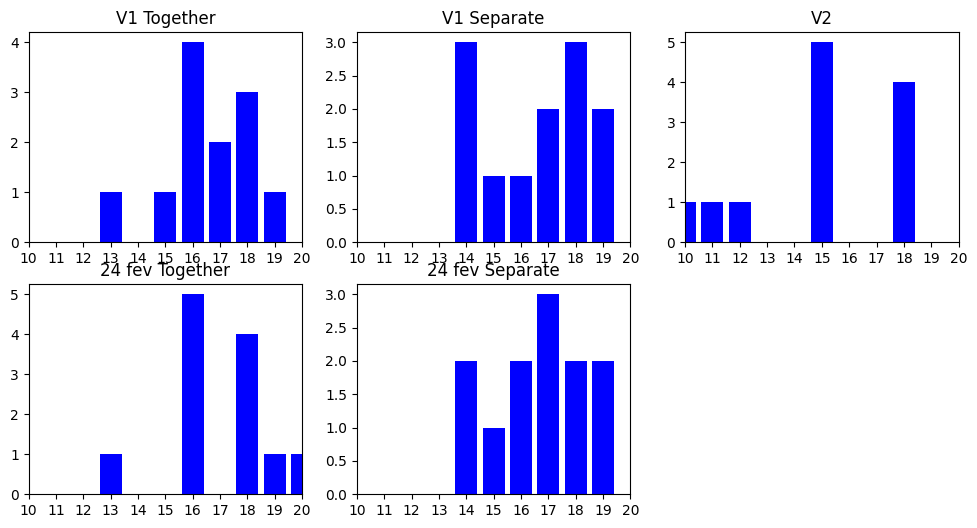

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

def create_histogram_from_tuples(plot, tuples_array, label, xmin=None, xmax=None, ymin=None, ymax=None):
    # Extract x and y values from the tuples
    x_values, y_values = zip(*tuples_array)

    # Create the histogram
    plot.bar(x_values, y_values, color='b')
    if xmin and xmax:
        plot.set_xlim(xmin, xmax)
    if ymin and ymax:   
        plot.set_ylim(ymin, ymax)
   
    plot.set_title(label)
    plot.xaxis.set_major_locator(MaxNLocator(integer=True))
    
fig, axs = plt.subplots(2, 3, figsize=(12, 6))
array_results = [results_V1_together, results_V1_separate, results_V2, results_24fev_together, results_24fev_separate]
array_results_titles = ["V1 Together", "V1 Separate", "V2", "24 fev Together", "24 fev Separate"]

for i, ax in enumerate(axs.flat):
    if i < len(array_results):
        create_histogram_from_tuples(ax, array_results[i], array_results_titles[i], 10, 20, 0, 5)
    else:
        ax.axis("off")
plt.show()



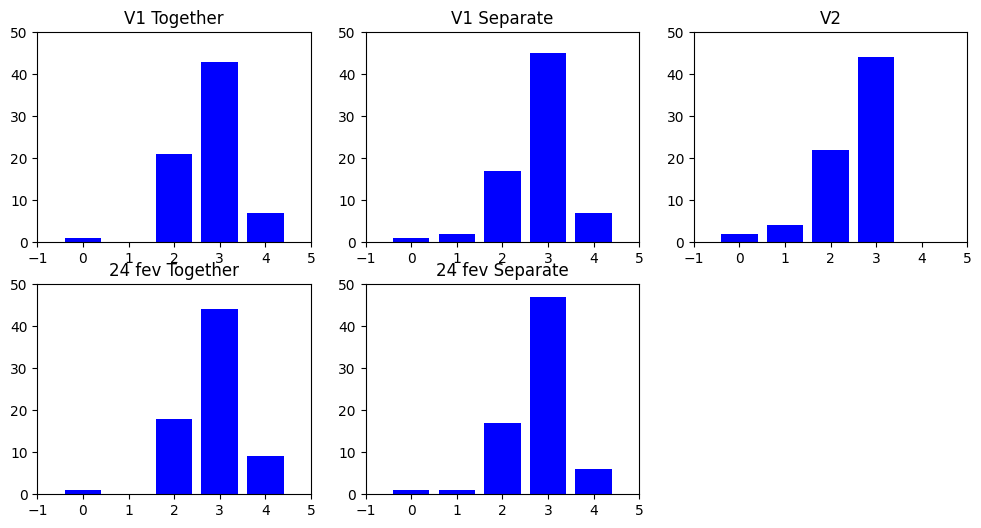

In [6]:
array_values = [values_v1_together, values_v1_separate, values_v2, values_24fev_together, values_24fev_separate]

fig, axs = plt.subplots(2, 3, figsize=(12, 6))

for i, ax in enumerate(axs.flat):
    if i < len(array_values):
        create_histogram_from_tuples(ax, array_values[i], array_results_titles[i], -1, 5, 0, 50)
    else:
        ax.axis("off")
plt.show()